In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

#Import des données 
df_info_rank=pd.read_csv('./Data/Data_utiles/info_rank_after_treatment')

df_info_rank.head()


,Unnamed: 0,ranking_date,rank,player_id,points,name_first,name_last,hand,height
0,0,19900101,1,100656,2913.0,Ivan,Lendl,R,188.0
1,1,19900101,2,101414,2279.0,Boris,Becker,R,190.0
2,2,19900101,3,101222,2111.0,Stefan,Edberg,R,188.0
3,3,19900101,4,100763,1398.0,Brad,Gilbert,R,185.0
4,4,19900101,5,100581,1354.0,John,McEnroe,L,180.0


### Visualisation de l'évolution du rang des joueurs au cours du temps

On va créer une fonction qui permet d'afficher l'évolution des joueurs du top 10 et les joueurs entre 40-50 sur une saison

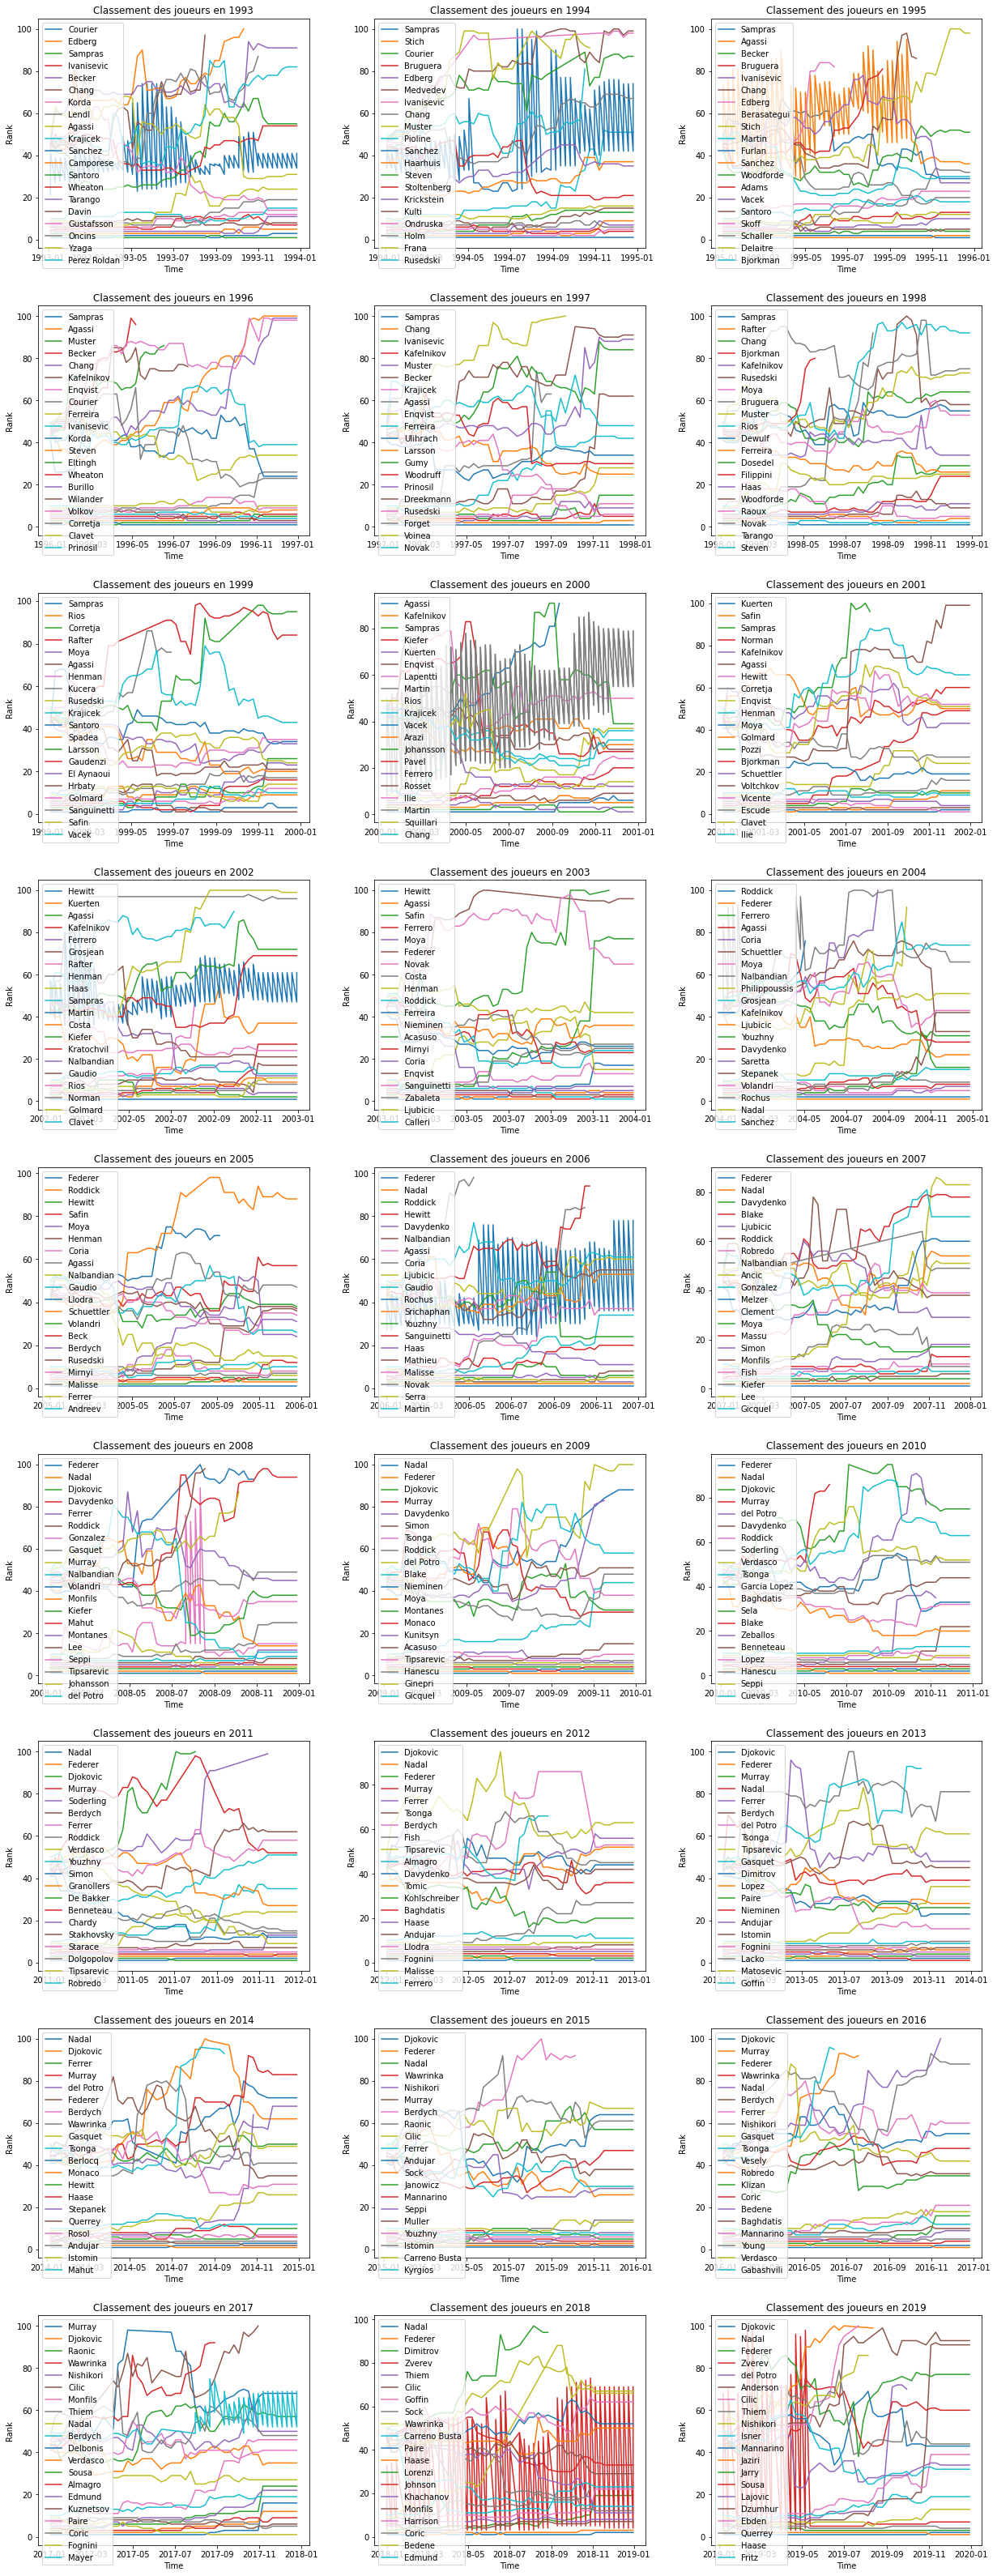

In [9]:

def visualisation_rank(year, dataset, ax):
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40

    for i, nom in enumerate(noms):
        df_individu = df_year[df_year['name_last'] == nom].copy()
        df_individu['ranking_date'] = pd.to_datetime(df_individu['ranking_date'], format='%Y%m%d')

        ax.plot(df_individu['ranking_date'], df_individu['rank'], label='{}'.format(nom))

    ax.set_xlabel('Time')
    ax.set_ylabel('Rank')
    ax.set_title('Classement des joueurs en {}'.format(year))
    ax.legend(loc='upper left')

# On Calcule le nombre de lignes nécessaires en fonction du nombre d'années
num_years = len(range(1993, 2020))
num_rows = (num_years // 3) + (1 if num_years % 3 != 0 else 0)

# On Crée une disposition en grille pour les sous-plots
fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))
fig.tight_layout(pad=5.0)

#On Utilise une boucle pour créer des sous-plots pour chaque année
for i, year in enumerate(range(1993, 2020)):
    row = i // 3
    col = i % 3
    visualisation_rank(year, df_info_rank, axs[row, col])


# Afficher la figure
plt.show()

        
    

### Analyse

On remarque que les classements des joueurs qui au début de la saison étaient dans le top 10 fluctuent beaucoup moins que ceux des joueurs entre 40 et 50.

Pour en être sûr nous pouvons regarder la moyenne ainsi que les écarts types du rang de chaque joueur sur une saison. 


In [32]:
def stats_rank(year,dataset):
    
    df_year = dataset[(dataset['ranking_date'] >= year * 10000) & (dataset['ranking_date'] < (year + 1) * 10000)].copy()

    noms_10 = [nom for nom in df_year[:10]['name_last']]
    noms_40 = [nom for nom in df_year[40:50]['name_last']]
    noms = noms_10 + noms_40
    
    liste_moyenne=[]
    liste_std=[]
    for nom in noms:
        liste_moyenne.append(df_year[df_year['name_last'] == nom].copy()['rank'].mean())
        liste_std.append(df_year[df_year['name_last'] == nom].copy()['rank'].std())
    
    #On regarde en moyenne quelle est le classement sur une année du top 10 et top 50
    moyenne_10=sum(liste_moyenne[:10])/10
    moyenne_50=sum(liste_moyenne[10:20])/10

    #On regarde en moyenne quel est l'écart type sur des joueurs sur une saison 
    std_10=sum(liste_std[:10])/10
    std_50=sum(liste_std[10:20])/10
    
    df_stats_rank=pd.DataFrame(list(zip(noms,liste_moyenne,liste_std)), columns=["Noms","Rang Moyen","Std"])
    return df_stats_rank,moyenne_10,moyenne_50,std_10,std_50

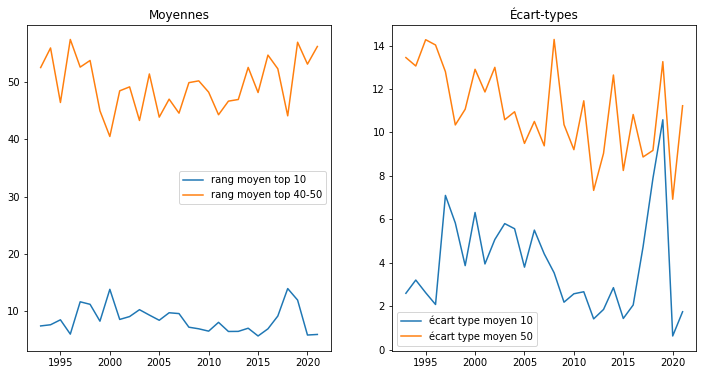

In [33]:

liste_moyennes_10=[]
liste_std_10=[]

liste_moyennes_50=[]
liste_std_50=[]

temps=[i for i in range(1993,2022)]

for year in range(1993,2022):
    
    df_stats_rank,moyenne_10,moyenne_50,std_10,std_50=stats_rank(year,df_info_rank)
    liste_moyennes_10.append(moyenne_10)
    liste_moyennes_50.append(moyenne_50)
    liste_std_10.append(std_10)
    liste_std_50.append(std_50)


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(temps, liste_moyennes_10, label='rang moyen top 10')
ax[0].plot(temps, liste_moyennes_50, label='rang moyen top 40-50')

ax[1].plot(temps, liste_std_10, label='écart type moyen 10')
ax[1].plot(temps, liste_std_50, label='écart type moyen 50')  

ax[0].set_title('Moyennes')
ax[1].set_title('Écart-types')

ax[0].legend()
ax[1].legend()

plt.show()